In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
onlineRetail = pd.read_csv(r'C:\Users\zeina\OneDrive\Desktop\uniDocts\online_retail_II.csv')

In [14]:
onlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041671 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice                1041671 non-null  object 
 1   StockCode              1041671 non-null  object 
 2   Description            1041671 non-null  object 
 3   Quantity               1041671 non-null  int64  
 4   InvoiceDate            1041671 non-null  object 
 5   Price                  1041671 non-null  float64
 6   Customer ID            805549 non-null   float64
 7   Country                1041671 non-null  object 
 8   TotalTransactionValue  1041671 non-null  float64
 9   Cluster                1041671 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 83.4+ MB


In [4]:
# Handle missing values: Remove rows where Quantity or Price is 0 or NaN
onlineRetail = onlineRetail[(onlineRetail['Quantity'] > 0) & (onlineRetail['Price'] > 0)]  # Remove invalid rows
onlineRetail = onlineRetail.dropna(subset=['Quantity', 'Price'])  # Drop rows with missing Quantity or Price

In [5]:
# Step 2: Create the 'TotalTransactionValue' feature
onlineRetail['TotalTransactionValue'] = onlineRetail['Quantity'] * onlineRetail['Price']

In [6]:
# Step 3: Select features for clustering
features = onlineRetail[['Quantity', 'Price', 'TotalTransactionValue']]

In [7]:
# Step 4: Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Step 5: Calculate WCSS (Within-Cluster Sum of Squares) for different k values

wcss = []  # To store the WCSS values for each k
for k in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

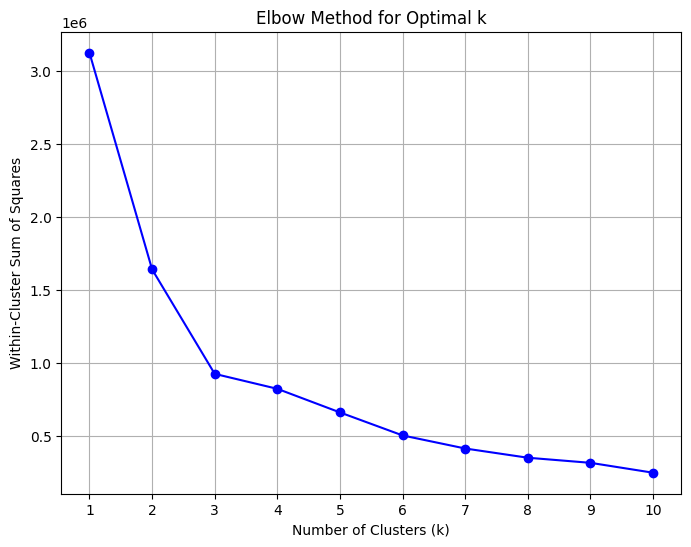

In [9]:
# Step 6: Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xticks(range(1, 11))  # To display all k values on x-axis
plt.grid(True)
plt.show()

In [10]:
# Based on the elbow plot, choose an optimal k (e.g., k=3 as a common choice)
optimal_k = 3  # Example: based on the plot, select the optimal k

In [11]:
# Step 7: Apply K-Means with the chosen k (e.g., k=3)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
onlineRetail['Cluster'] = kmeans.fit_predict(scaled_features)

In [12]:
print(onlineRetail['Cluster'].value_counts())

Cluster
0    1041650
2         19
1          2
Name: count, dtype: int64
